In [1]:
!pip install opencv-python

     --------------------------------------- 35.6/35.6 MB 20.4 MB/s eta 0:00:00


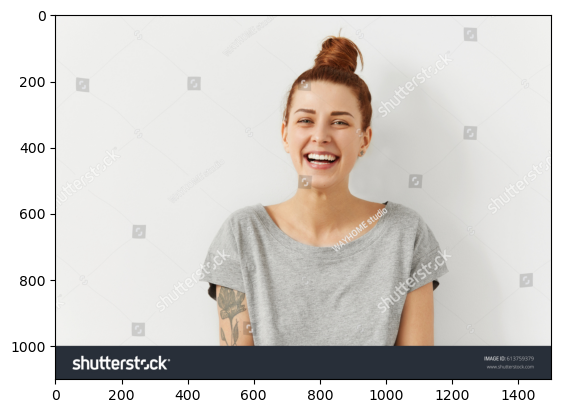

In [2]:
#이미지 다운로드
#urllib.request 모듈은 웹사이트 데이터 접근
import urllib.request as req
import matplotlib.pyplot as plt
import cv2

url = 'https://image.shutterstock.com/z/stock-photo-happy-cheerful-young-woman-wearing-her-red-hair-\
in-bun-rejoicing-at-positive-news-or-birthday-gift-613759379.jpg'
req.urlretrieve(url, 'lady.png')   #download

#OpenCV로 읽어 들이기
img = cv2.imread('lady.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  #이미지 출력
plt.show()

In [6]:
import cv2

path = 'Lena.png'
image = cv2.imread(path)
window_name = 'image'
cv2.imshow(window_name, image)
cv2.waitKey()   #아무 키를 누를 때까지 기다림
cv2.destroyAllWindows()   #closing all open windows

In [7]:
path = 'Lena.png'
image = cv2.imread(path, 0)
window_name = 'image'
cv2.imshow(window_name, image)
cv2.waitKey()   #아무 키를 누를 때까지 기다림
cv2.destroyAllWindows()   #closing all open windows

In [10]:
path = 'Lena.png'
image = cv2.imread(path)

x,y,w,h = cv2.selectROI('image', image, False)
if w and h:
    roi = image[y:y+h, x:x+w]
    cv2.imshow('drag', roi)
    cv2.imwrite('drag.jpg', roi)   #저장하기
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

In [1]:
%pwd

'C:\\cakd8\\jupyter\\OpenCV_gui'

In [2]:
%cd C:/cakd8/jupyter/OpenCV_gui/data

C:\cakd8\jupyter\OpenCV_gui\data


In [3]:
import cv2

image = cv2.imread("pattern_2-1-8-10-D.jpg")
print(image.shape)
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

(1118, 1119, 3)


In [42]:
#마우스로 좌표 위치를 확인
image = cv2.imread("pattern_2-1-8-10-D.jpg")
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
x,y,w,h = cv2.selectROI("image", image, False)
if w and h:
    roi = image[y:y+h, x:x+w]
    print(y,y+h, x,x+w)
    cv2.imwrite("drag.jpg", roi)
    
cv2.imshow('image', image)
cv2.waitKey()
cv2.destroyAllWindows()

35 65 579 606


In [48]:
#바운딩박스 만들기
image = cv2.imread("pattern_2-1-8-10-D.jpg")
cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imagebound = image.copy()
blue = (255,0,0)
cv2.rectangle(imagebound, (97,61), (142,102), blue,2)
cv2.rectangle(imagebound, (647,263), (665,281), blue,2)
cv2.rectangle(imagebound, (555,102), (566,114), blue,2)
cv2.rectangle(imagebound, (573,73), (589,88), blue,2)
cv2.rectangle(imagebound, (577,35), (606,64), blue,2)

cv2.imshow('image', imagebound)
cv2.waitKey()
cv2.destroyAllWindows()

In [50]:
#복사붙여넣기
x=97;y=61; w=45; h=41;
roi = imagebound[y:y+h, x:x+w]
imagebound[y:y+h, x:x+w] = roi
cv2.rectangle(imagebound, (x,y), (x+w+w, y+h), blue,2)
cv2.imshow('image', imagebound)
cv2.waitKey()
cv2.destroyAllWindows()

In [51]:
!pip install wget

  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=addeb76be5ebc38043dd5566c509485b142310fe07bc5f962f5e0f47a8833ef2
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\46\4a\43\6e71c9584e8b20b326931deaf89f11bf4db1bda170ac38e7b4
Successfully built wget


In [52]:
import wget
url = 'https://github.com/chulminkw/DLCV/blob/master/data/video/Night_Day_Chase.mp4?raw=true'
wget.download(url)

 10% [.......                                                                 ]  2392064 / 23351010100% [........................................................................] 23351010 / 23351010

'Night_Day_Chase.mp4'

In [53]:
ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: CA06-287E

 C:\cakd8\jupyter\OpenCV_gui\data 디렉터리

2022-12-29  오후 12:11    <DIR>          .
2022-12-29  오후 12:11    <DIR>          ..
2022-12-29  오전 11:44             1,013 drag.jpg
2022-12-29  오후 12:11        23,351,010 Night_Day_Chase.mp4
2022-12-29  오전 11:20           206,448 pattern_2-1-8-10-D.jpg
               3개 파일          23,558,471 바이트
               2개 디렉터리  844,753,731,584 바이트 남음


In [74]:
#동영상 불러오기
#cap.read() 영상 정보 읽기, cap.get() 옵션으로 다른 정보만 추출해서 영상 정보를 읽기
import cv2
cap = cv2.VideoCapture('Night_Day_Chase.mp4')
cap
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
    if cv2.waitKey(10)&0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [57]:
cap = cv2.VideoCapture('Night_Day_Chase.mp4')
width = cap.get((cv2.CAP_PROP_FRAME_WIDTH))
height = cap.get((cv2.CAP_PROP_FRAME_HEIGHT))  #(200,400)
count = cap.get((cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get((cv2.CAP_PROP_FPS))
print('가로: ', str(width))
print('세로: ', str(height))
print('총 프레임수: ', str(count))
print('FPS: ', str(fps))

가로:  1216.0
세로:  516.0
총 프레임수:  1383.0
FPS:  28.282227867912656


OpenCV를 활용한 영상 처리
- OpenCV의 VideoCapture 클래스
  - 동영상을 개별 Frame으로 하나씩 읽어들이는 기능 제공
  - 생성 인자로 입력 video 파일 위치를 받아 생성
    - cap=cv2.VideoCapture(video_input_path)
  - 입력 video 파일의 다양한 속성 가져오기 가능
    - 영상 Frame 너비
      cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    - 영상 Frame 높이
      cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    - 영상 FPS(Frame Per Second)
      cap.get(cv2.CAP_PROP_FPS)
  - read()는 마지막 Frame까지 차례로 Frame을 읽음
- VideoWriter
  - VideoCapture로 읽어들인 개별 Frame을 동영상 파일로 Write 수행
  - write할 동영상 파일 위치, Encoding 코덱 유형, write fps 수치, frame 크기를 생성자로 입력 받음
  - 이들 값에 따른 동영상 write 수행
  - write 시, 특정 포맷으로 동영상 Encoding 가능
    - DIVX, XVID, MJPG, X264, WMV1, WMV2


In [75]:
#VideoCapturer 객체와 VideoWriter 객체를 생성하고 frame의 갯수, FPS, video Frame 크기의 정보를 읽어 출력
import cv2

video_input_path = 'Night_Day_Chase.mp4'
video_output_path = 'Night_Day_Chase_out.mp4'

cap = cv2.VideoCapture(video_input_path)

codec = cv2.VideoWriter_fourcc(*'XVID')

vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cv2.CAP_PROP_FRAME_HEIGHT))   #(200,400)
vid_fps = cap.get(cv2.CAP_PROP_FPS)

vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size)

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수: ', frame_cnt, 'FPS: ', round(vid_fps), 'Frame 크기: ', vid_size)

총 Frame 갯수:  1383 FPS:  28 Frame 크기:  (1216, 4)


In [70]:
import time

green_color = (0,255,0)
red_color = (0,0,255)

start = time.time()
index = 0
#프레임 하나씩 읽고 쓰기
while True:
    hasFrame, img_frame = cap.read()
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    index += 1
    print('frame: ', index, '처리 완료')
    
    cv2.rectangle(img_frame, (300,100,800,400), color=green_color, thickness=2)
    caption = 'frame: {}'.format(index)
    cv2.putText(img_frame, caption, (300,95), cv2.FONT_HERSHEY_SIMPLEX, 0.7, red_color, 1)
    
    vid_writer.write(img_frame)
    
print('write 완료 시간: ', round(time.time() - start, 4))
vid_writer.release()
cap.release()

frame:  1 처리 완료
frame:  2 처리 완료
frame:  3 처리 완료
frame:  4 처리 완료
frame:  5 처리 완료
frame:  6 처리 완료
frame:  7 처리 완료
frame:  8 처리 완료
frame:  9 처리 완료
frame:  10 처리 완료
frame:  11 처리 완료
frame:  12 처리 완료
frame:  13 처리 완료
frame:  14 처리 완료
frame:  15 처리 완료
frame:  16 처리 완료
frame:  17 처리 완료
frame:  18 처리 완료
frame:  19 처리 완료
frame:  20 처리 완료
frame:  21 처리 완료
frame:  22 처리 완료
frame:  23 처리 완료
frame:  24 처리 완료
frame:  25 처리 완료
frame:  26 처리 완료
frame:  27 처리 완료
frame:  28 처리 완료
frame:  29 처리 완료
frame:  30 처리 완료
frame:  31 처리 완료
frame:  32 처리 완료
frame:  33 처리 완료
frame:  34 처리 완료
frame:  35 처리 완료
frame:  36 처리 완료
frame:  37 처리 완료
frame:  38 처리 완료
frame:  39 처리 완료
frame:  40 처리 완료
frame:  41 처리 완료
frame:  42 처리 완료
frame:  43 처리 완료
frame:  44 처리 완료
frame:  45 처리 완료
frame:  46 처리 완료
frame:  47 처리 완료
frame:  48 처리 완료
frame:  49 처리 완료
frame:  50 처리 완료
frame:  51 처리 완료
frame:  52 처리 완료
frame:  53 처리 완료
frame:  54 처리 완료
frame:  55 처리 완료
frame:  56 처리 완료
frame:  57 처리 완료
frame:  58 처리 완료
frame:  59 처리 완료
frame:

In [72]:
import cv2
cap = cv2.VideoCapture('Night_Day_Chase_out.mp4')
cap
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret:
        cv2.imshow('frame', frame)
    if cv2.waitKey(100)&0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()